# Limpeza e Tratamento dos Dados

In [ ]:
import pandas as pd
import numpy as np

# Ler o dataset
df = pd.read_csv('sales_data_analisado.csv')

# Criar as variáveis faltantes
df['satisfacao_do_cliente'] = df['Quantidade Devolvida'].apply(lambda x: 'insatisfeito' if x > 0 else 'satisfeito')
df['impacto_de_promocoes'] = df['Quantidade Vendida'].diff()

# Exibir as primeiras linhas do dataframe
print(df.head())

# Remover duplicatas se existirem
df = df.drop_duplicates()

# Verificar valores ausentes
print(df.isnull().sum())

# Renove valores nulos
df = df.dropna()


# Remover outliers usando o método IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Aplicar a remoção de outliers em colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df = remove_outliers(df, col)

# Verificar novamente valores ausentes após remoção de outliers
print(df.isnull().sum())

# Salvar o dataset atualizado
df.to_csv('sales_data_analisado_atualizado.csv', index=False)

# Análise Exploratória dos Dados

In [ ]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas descritivas
print(df.describe())

# Distribuição das vendas por categoria de produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='Categoria', y='Vendas', data=df)
plt.title('Distribuição das Vendas por Categoria de Produto')
plt.xticks(rotation=45)
plt.show()

# Distribuição das vendas por localização
plt.figure(figsize=(12, 6))
sns.boxplot(x='Localizaçao', y='Vendas', data=df)
plt.title('Distribuição das Vendas por Localização')
plt.xticks(rotation=45)
plt.show()


# Distribuição de Vendas por Categoria
plt.figure(figsize=(10, 6))
df['Categoria'].value_counts().plot(kind='bar')
plt.title('Distribuição de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.show()

# Distribuição de Vendas por Localização
plt.figure(figsize=(10, 6))
df['Localizaçao'].value_counts().plot(kind='bar')
plt.title('Distribuição de Vendas por Localização')
plt.xlabel('Localização')
plt.ylabel('Quantidade Vendida')
plt.show()

# Boxplot de Vendas por Produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='Produto', y='Vendas', data=df)
plt.title('Boxplot de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.show()

# Histograma de Quantidade Vendida
plt.figure(figsize=(10, 6))
df['Quantidade'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histograma de Quantidade Vendida')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

# Scatter Plot de Preço Unitário vs Vendas
plt.figure(figsize=(10, 6))
plt.scatter(df['Preço Unitário'], df['Vendas'], alpha=0.5)
plt.title('Scatter Plot de Preço Unitário vs Vendas')
plt.xlabel('Preço Unitário')
plt.ylabel('Vendas')
plt.show()

# Vendas por Mês
sales_by_month = df.groupby('Mês')['Vendas'].sum()
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.show()


#Gráfico de Vendas ao longo do tempo
sales_by_date = df.groupby('Data')['Vendas'].sum()
plt.figure(figsize=(12, 6))
sales_by_date.plot(kind='line')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()



# Entendo do Problema de Négocio

Análise de Rotatividade do Estoque

  ID de Cliente  Produto   Categoria Localizaçao        Data  Quantidade  \
1    Cliente 46     Boné  Acessórios      Loja C  2023-11-22           4   
2    Cliente 19     Boné  Acessórios      Loja B  2022-12-23           3   
3    Cliente 74  Jaqueta  Acessórios      Loja A  2023-09-09           7   
4    Cliente 27  Jaqueta    Calçados      Loja C  2022-06-19           9   
5    Cliente 37     Boné      Roupas      Loja C  2022-10-14           6   

   Preço Unitário      Vendas       Cesta de Compras  Capacidade de Estoque  \
1       79.441909  317.767635                  Tênis                    100   
2       21.578283   64.734848  Boné, Tênis, Camiseta                    120   
3       33.269749  232.888241           Calça, Tênis                     80   
4       36.063616  324.572543                   Boné                     80   
5       30.874346  185.246075         Camiseta, Boné                    150   

   ...  Custo de Armazenamento por Unidade  Custo de Armazenamento  

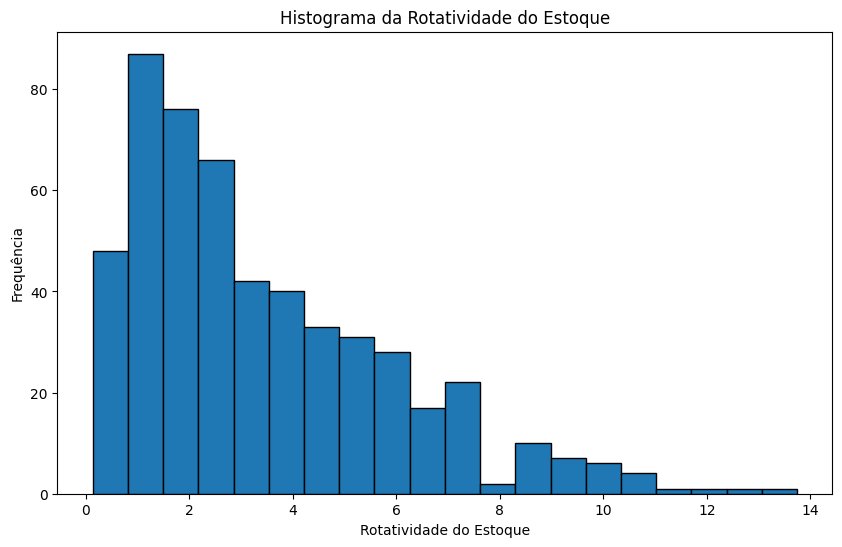

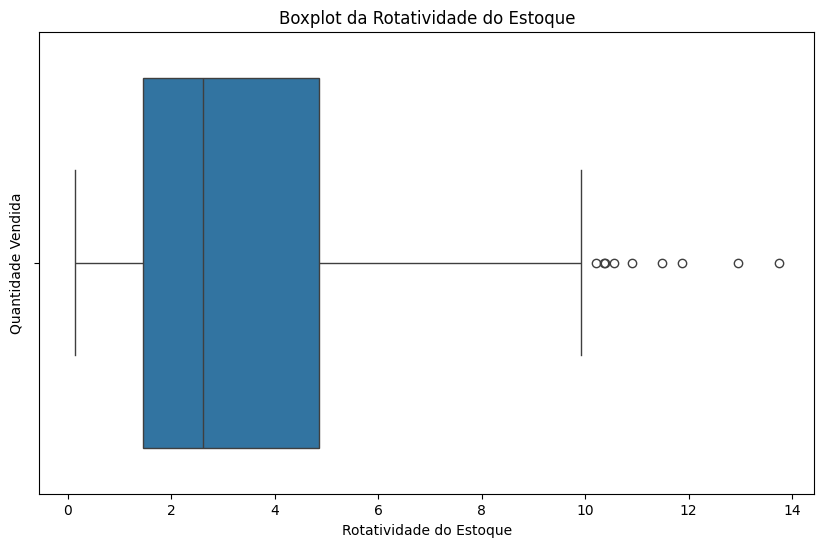

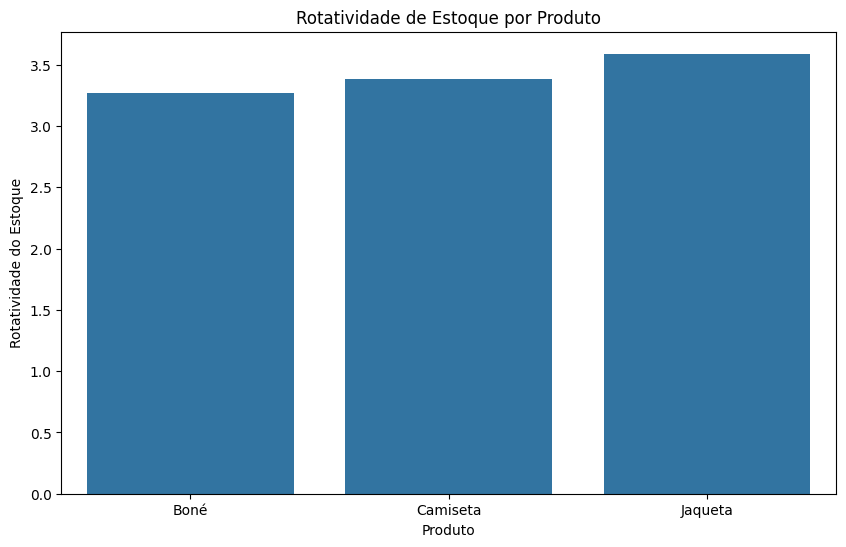

In [3]:

# Importar bibliotecas necessárias
import numpy as np

# Criar variáveis de Estoque Inicial e Estoque Final com valores aleatórios para o exemplo
np.random.seed(42)  # Para reprodutibilidade
df['Estoque Inicial'] = np.random.randint(50, 150, size=len(df))
df['Estoque Final'] = np.random.randint(50, 150, size=len(df))

# Calcular o CMV (Custo das Mercadorias Vendidas)
df['CMV'] = df['Quantidade'] * df['Preço Unitário']
# Calcular o Estoque Médio
df['Estoque Médio'] = (df['Estoque Inicial'] + df['Estoque Final']) / 2

# Calcular a Rotatividade do Estoque

df['Rotatividade do Estoque'] = df['CMV'] / df['Estoque Médio'].replace(0, np.nan)

# Exibir as primeiras linhas do dataframe
print(df.head())

# Exibir a média e o desvio padrão da Rotatividade do Estoque

media_rotatividade_estoque = df['Rotatividade do Estoque'].mean()
desvio_padrao_rotatividade_estoque = df['Rotatividade do Estoque'].std()
print(f'Média da Rotatividade do Estoque: {media_rotatividade_estoque}')
print(f'Desvio Padrão da Rotatividade do Estoque: {desvio_padrao_rotatividade_estoque}')

# Exibir gráficos da Rotatividade de Estoque

plt.figure(figsize=(10, 6))
df['Rotatividade do Estoque'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histograma da Rotatividade do Estoque')
plt.xlabel('Rotatividade do Estoque')
plt.ylabel('Frequência')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rotatividade do Estoque', data=df)
plt.title('Boxplot da Rotatividade do Estoque')
plt.xlabel('Rotatividade do Estoque')
plt.ylabel('Quantidade Vendida')
plt.show()

#Exibir a Rotatividade de Estoquue por produto

rotatividade_estoque_por_produto = df.groupby('Produto')['Rotatividade do Estoque'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Rotatividade do Estoque', data=rotatividade_estoque_por_produto)
plt.title('Rotatividade de Estoque por Produto')
plt.show()



 Gestão de Estoque

Análise de Demanda por Produtos

15:16:57 - cmdstanpy - INFO - Chain [1] start processing
15:16:58 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
0   2022-01-07  12.440878    1.279673   22.997114
1   2022-01-12  12.228591    1.124425   23.362626
2   2022-01-30  14.303827    3.109937   25.055899
3   2022-02-03  16.389441    5.899465   27.204731
4   2022-02-13  14.322404    3.335048   24.867156
..         ...        ...         ...         ...
518 2024-12-14  19.278576    8.180951   29.745689
519 2024-12-15  15.697106    4.573085   26.319841
520 2024-12-16  13.743395    2.946662   24.545293
521 2024-12-17  13.297786    3.454375   24.143743
522 2024-12-18  13.649736    2.513249   24.506322

[523 rows x 4 columns]


c:\Users\sara1\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sara1\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\3544994363.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


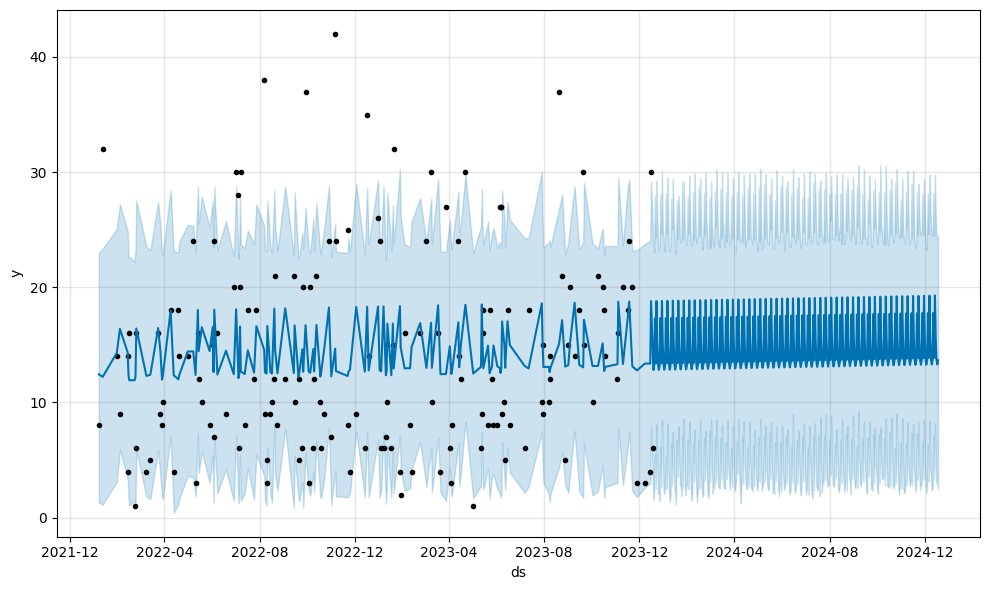

In [4]:
# Importar bibliotecas necessárias
from prophet import Prophet

# Preparar os dados para o Prophet
produto_especifico = df[df['Produto'] == 'Jaqueta']

# Agregar as vendas por data
vendas_por_data = produto_especifico.groupby('Data')['Quantidade Vendida'].sum().reset_index()

# Renomear colunas para o formato esperado pelo Prophet
vendas_por_data.columns = ['ds', 'y']

# Criar e ajustar o modelo Prophet
modelo = Prophet()
modelo.fit(vendas_por_data)

# Fazer previsões para os próximos 12 meses
futuro = modelo.make_future_dataframe(periods=365)
previsao = modelo.predict(futuro)

# Exibir as previsões
print(previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plotar as previsões
figura = modelo.plot(previsao)
figura.show()

# Salvar as previsões em um arquivo CSV
previsao.to_csv('previsao_demanda_jaqueta.csv', index=False)


In [ ]:
# Importar bibliotecas necessárias
from prophet import Prophet

# Preparar os dados para o Prophet
produto_especifico = df[df['Produto'] == 'Boné']

# Agregar as vendas por data
vendas_por_data = produto_especifico.groupby('Data')['Quantidade Vendida'].sum().reset_index()

# Renomear colunas para o formato esperado pelo Prophet
vendas_por_data.columns = ['ds', 'y']

# Criar e ajustar o modelo Prophet
modelo = Prophet()
modelo.fit(vendas_por_data)

# Fazer previsões para os próximos 12 meses
futuro = modelo.make_future_dataframe(periods=365)
previsao = modelo.predict(futuro)

# Exibir as previsões
print(previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plotar as previsões
figura = modelo.plot(previsao)
figura.show()

# Salvar as previsões em um arquivo CSV
previsao.to_csv('previsao_demanda_boné.csv', index=False)


15:17:00 - cmdstanpy - INFO - Chain [1] start processing
15:17:00 - cmdstanpy - INFO - Chain [1] done processing


            ds       yhat  yhat_lower  yhat_upper
0   2022-01-03  10.692991   -3.023857   24.494424
1   2022-01-07  11.518203   -0.978051   24.853667
2   2022-01-11  11.456896   -2.141671   25.334751
3   2022-01-14  11.557911   -2.166651   24.519201
4   2022-01-15  12.488419   -0.599022   26.461334
..         ...        ...         ...         ...
507 2024-12-12  19.260391    5.972790   32.767745
508 2024-12-13  17.593435    5.234439   31.532568
509 2024-12-14  18.523943    4.711081   31.963466
510 2024-12-15  20.743506    7.794184   34.714274
511 2024-12-16  16.807930    2.196560   30.251338

[512 rows x 4 columns]


c:\Users\sara1\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\sara1\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\32600837.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


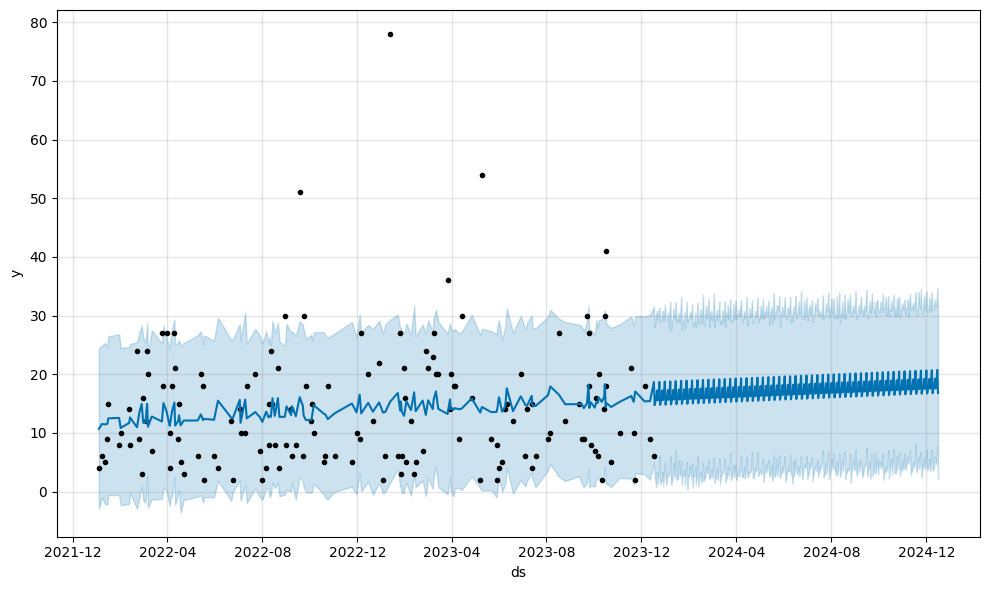

In [6]:
# Importar bibliotecas necessárias
from prophet import Prophet

# Preparar os dados para o Prophet
produto_especifico = df[df['Produto'] == 'Camiseta']

# Agregar as vendas por data
vendas_por_data = produto_especifico.groupby('Data')['Quantidade Vendida'].sum().reset_index()

# Renomear colunas para o formato esperado pelo Prophet
vendas_por_data.columns = ['ds', 'y']

# Criar e ajustar o modelo Prophet
modelo = Prophet()
modelo.fit(vendas_por_data)

# Fazer previsões para os próximos 12 meses
futuro = modelo.make_future_dataframe(periods=365)
previsao = modelo.predict(futuro)

# Exibir as previsões
print(previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plotar as previsões
figura = modelo.plot(previsao)
figura.show()

# Salvar as previsões em um arquivo CSV
previsao.to_csv('previsao_demanda_camiseta.csv', index=False)


Segmentação do Produto

C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\1128256925.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentacao['Segmento'] = kmeans.fit_predict(df_segmentacao_normalizado)


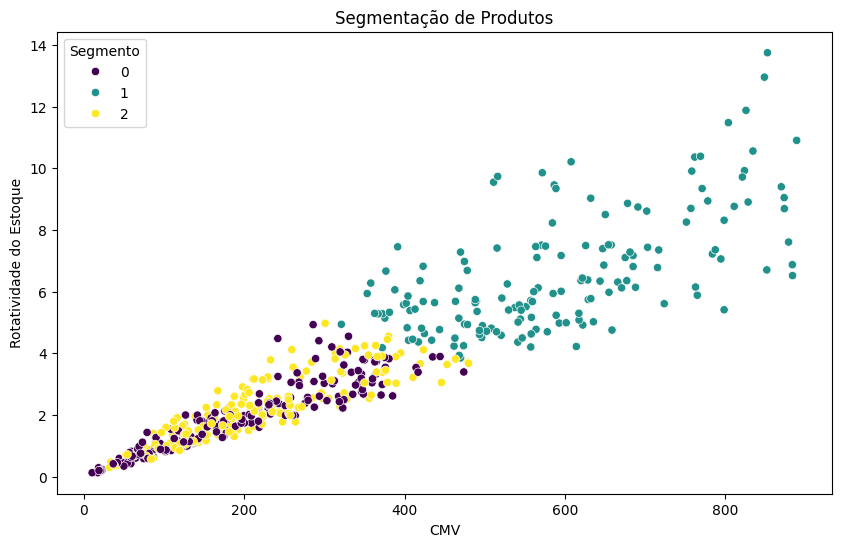

   Quantidade  Preço Unitário         CMV  Estoque Médio  \
1           4       79.441909  317.767635          122.0   
2           3       21.578283   64.734848          107.0   
3           7       33.269749  232.888241           61.5   
4           9       36.063616  324.572543          119.5   
5           6       30.874346  185.246075          129.5   

   Rotatividade do Estoque  Segmento  
1                 2.604653         0  
2                 0.604999         0  
3                 3.786801         2  
4                 2.716088         2  
5                 1.430472         2  


In [7]:
# Importar bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar as colunas relevantes para a segmentação
df_segmentacao = df[[ 'Quantidade', 'Preço Unitário', 'CMV', 'Estoque Médio', 'Rotatividade do Estoque']]

# Normalizar os dados
scaler = StandardScaler()
df_segmentacao_normalizado = scaler.fit_transform(df_segmentacao[['Quantidade', 'Preço Unitário', 'CMV', 'Estoque Médio', 'Rotatividade do Estoque']])

# Aplicar o K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df_segmentacao['Segmento'] = kmeans.fit_predict(df_segmentacao_normalizado)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_segmentacao, x='CMV', y='Rotatividade do Estoque', hue='Segmento', palette='viridis')
plt.title('Segmentação de Produtos')
plt.xlabel('CMV')
plt.ylabel('Rotatividade do Estoque')
plt.legend(title='Segmento')
plt.show()

# Exibir o DataFrame com os segmentos
print(df_segmentacao.head())

Ponto de Reposição

   Produto  Demanda Média Diária  Tempo de Reposição  Estoque de Segurança  \
1     Boné                     1                   3                    32   
2     Boné                     4                   4                    48   
3  Jaqueta                     4                   3                    43   
4  Jaqueta                     6                   1                    26   
5     Boné                     4                   2                    12   

   Ponto de Reposição  
1                  35  
2                  64  
3                  55  
4                  32  
5                  20  


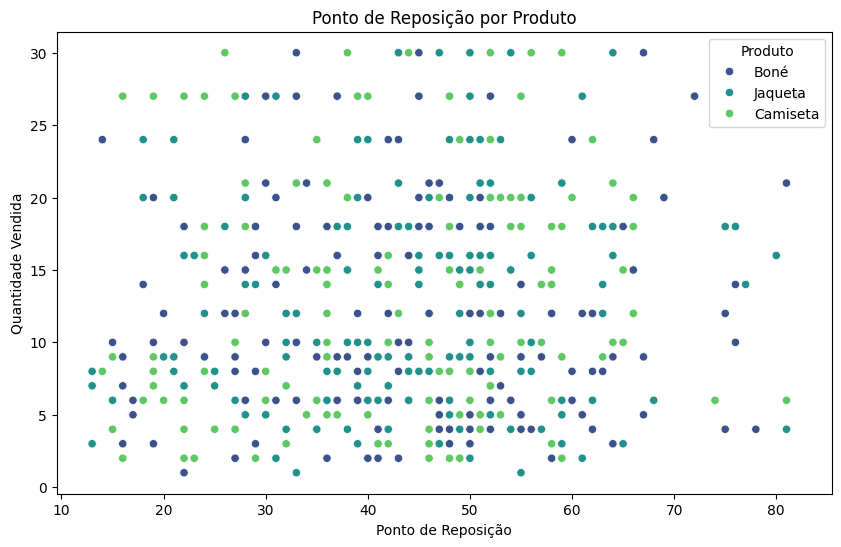

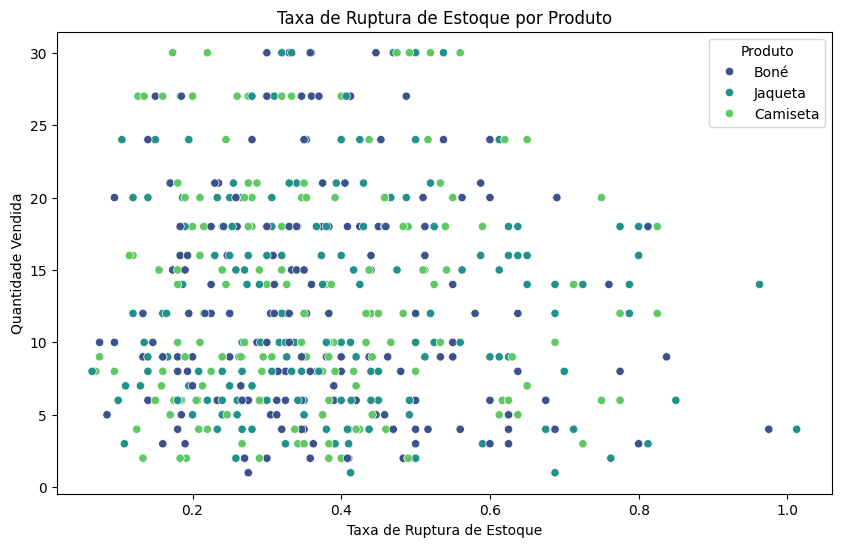

In [8]:
# Definir a Demanda Média Diária (DMD), Tempo de Reposição (TR) e Estoque de Segurança (ES) para exemplo
df['Demanda Média Diária'] = np.random.randint(1, 10, size=len(df))  #  demanda média diária
df['Tempo de Reposição'] = np.random.randint(1, 5, size=len(df))  #  tempo de reposição em dias
df['Estoque de Segurança'] = np.random.randint(10, 50, size=len(df))  # estoque de segurança

# Calcular o Ponto de Reposição (PR)
df['Ponto de Reposição'] = (df['Demanda Média Diária'] * df['Tempo de Reposição']) + df['Estoque de Segurança']

# Exibir o DataFrame com a nova coluna Ponto de Reposição
df_ponto_reposicao = df[['Produto', 'Demanda Média Diária', 'Tempo de Reposição', 'Estoque de Segurança', 'Ponto de Reposição']]
print(df_ponto_reposicao.head())

# Exubir Grafico de Ponto de reposição
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ponto de Reposição', y='Quantidade Vendida', hue='Produto', palette='viridis')
plt.title('Ponto de Reposição por Produto')
plt.xlabel('Ponto de Reposição')
plt.ylabel('Quantidade Vendida')
plt.show()

# Calcular a Taxa de Ruptura de Estoque
df['Taxa de Ruptura de Estoque'] = df['Ponto de Reposição'] / df['Capacidade de Estoque']

# Exibir a Taxa de Ruptura de Estoque
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Taxa de Ruptura de Estoque', y='Quantidade Vendida', hue='Produto', palette='viridis')
plt.title('Taxa de Ruptura de Estoque por Produto')
plt.xlabel('Taxa de Ruptura de Estoque')
plt.ylabel('Quantidade Vendida')
plt.show()


Análises de KPIS

           Data   Produto  Ponto de Reposição  Capacidade de Estoque  \
1    2023-11-22      Boné                  35                    100   
2    2022-12-23      Boné                  64                    120   
3    2023-09-09   Jaqueta                  55                     80   
4    2022-06-19   Jaqueta                  32                     80   
5    2022-10-14      Boné                  20                    150   
..          ...       ...                 ...                    ...   
570  2023-01-17   Jaqueta                  59                    120   
571  2022-12-19   Jaqueta                  45                    120   
572  2023-10-11  Camiseta                  49                    100   
573  2023-10-24      Boné                  28                     80   
574  2022-07-03  Camiseta                  36                    200   

     Tempo de Pedido  Tempo de Atendimento         CMV  Rotatividade  \
1                  2                     5  317.767635     17.1

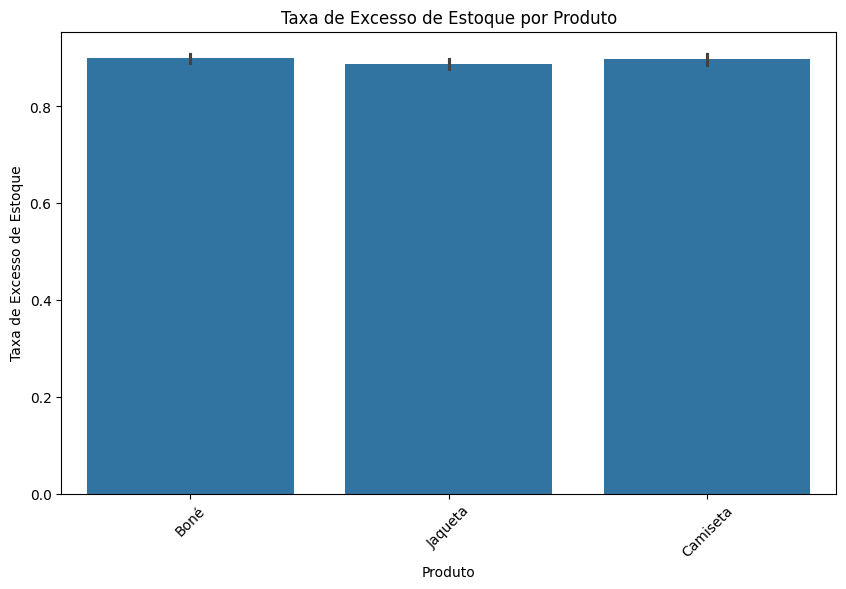

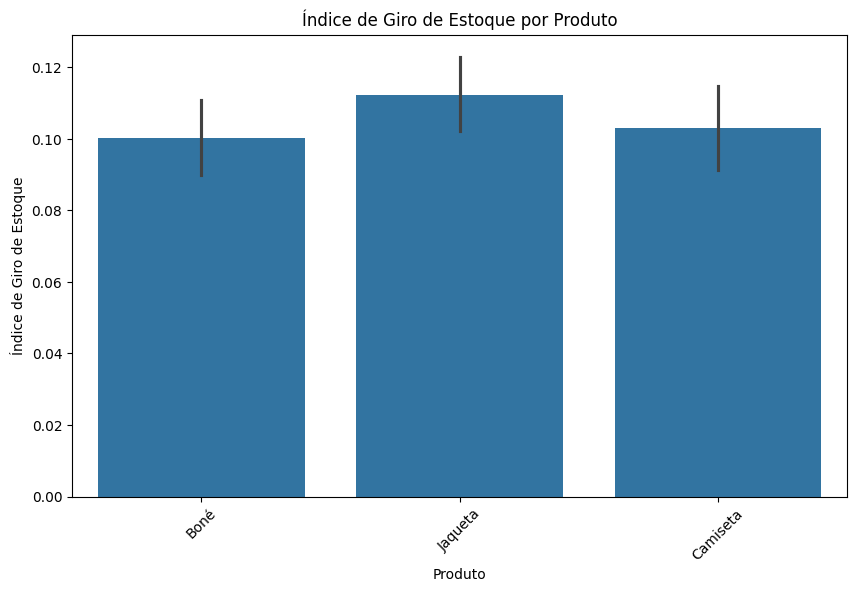

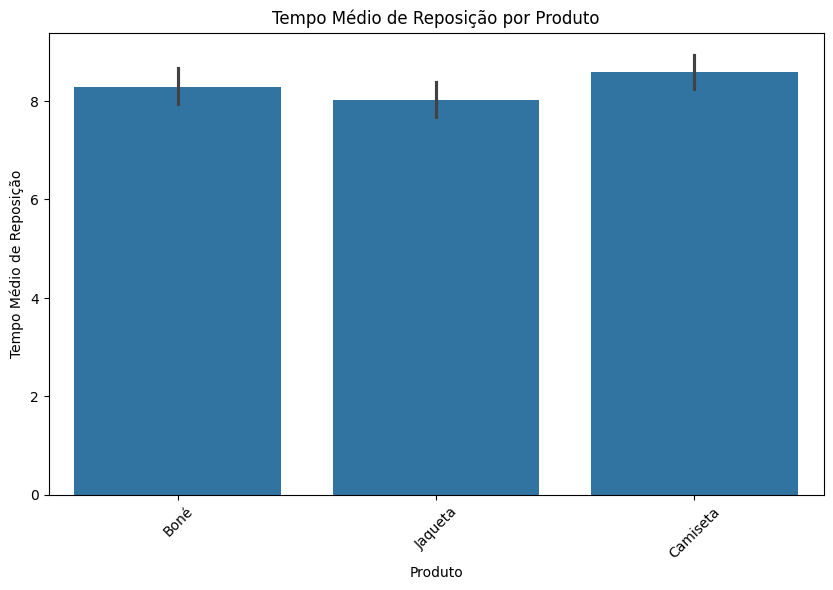

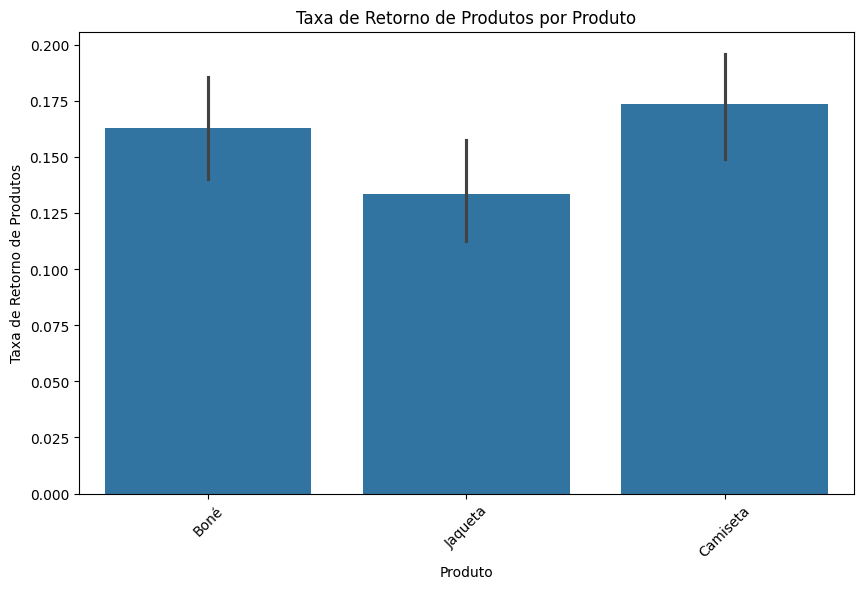

In [9]:

# Calcular a Taxa de Excesso de Estoque (Overstock Rate)
df['Taxa de Excesso de Estoque'] = (df['Capacidade de Estoque'] - df['Quantidade Vendida']) / df['Capacidade de Estoque']

# Calcular o Índice de Giro de Estoque
df['Índice de Giro de Estoque'] = df['Quantidade Vendida'] / df['Capacidade de Estoque']

# Calcular o Tempo Médio de Reposição
df['Tempo Médio de Reposição'] = df['Tempo de Pedido'] + df['Tempo de Atendimento']

# Calcular a Taxa de Retorno de Produtos
df['Taxa de Retorno de Produtos'] = df['Quantidade Devolvida'] / df['Quantidade Vendida']

# Exibir o DataFrame com as novas colunas

print(df[['Data', 'Produto', 'Ponto de Reposição', 'Capacidade de Estoque', 'Tempo de Pedido', 'Tempo de Atendimento', 'CMV', 'Rotatividade', 'Taxa de Ruptura de Estoque', 'Taxa de Excesso de Estoque', 'Índice de Giro de Estoque', 'Tempo Médio de Reposição', 'Taxa de Retorno de Produtos', 'Categoria']])

# Gráfico de Taxa de Excesso de Estoque
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Taxa de Excesso de Estoque', data=df)
plt.title('Taxa de Excesso de Estoque por Produto')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Índice de Giro de Estoque
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Índice de Giro de Estoque', data=df)
plt.title('Índice de Giro de Estoque por Produto')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Tempo Médio de Reposição
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Tempo Médio de Reposição', data=df)
plt.title('Tempo Médio de Reposição por Produto')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Taxa de Retorno de Produtos
plt.figure(figsize=(10, 6))
sns.barplot(x='Produto', y='Taxa de Retorno de Produtos', data=df)
plt.title('Taxa de Retorno de Produtos por Produto')
plt.xticks(rotation=45)
plt.show()

    Produto  Quantidade Vendida  Capacidade de Estoque           CMV  \
0      Boné                2186             127.826087  55390.938843   
1  Camiseta                2068             133.414634  53280.428328   
2   Jaqueta                2245             123.771429  58720.627166   

   Rotatividade  Taxa de Ruptura de Estoque  Taxa de Excesso de Estoque  \
0     17.118511                    0.368406                    0.899620   
1     15.650242                    0.355874                    0.896890   
2     18.567042                    0.391167                    0.887586   

   Índice de Giro de Estoque  Tempo Médio de Reposição  \
0                   0.100380                  8.293478   
1                   0.103110                  8.585366   
2                   0.112414                  8.017143   

   Taxa de Retorno de Produtos  
0                     0.163020  
1                     0.173432  
2                     0.133525  


C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\1554420666.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto', y=kpi, data=segmentacao, ax=ax, palette=palette)
C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\1554420666.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\1554420666.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto', y=kpi, data=segmentacao, ax=ax, palette=palette)
C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\1554420666.py:43: UserWarning: set_ticklabels() 

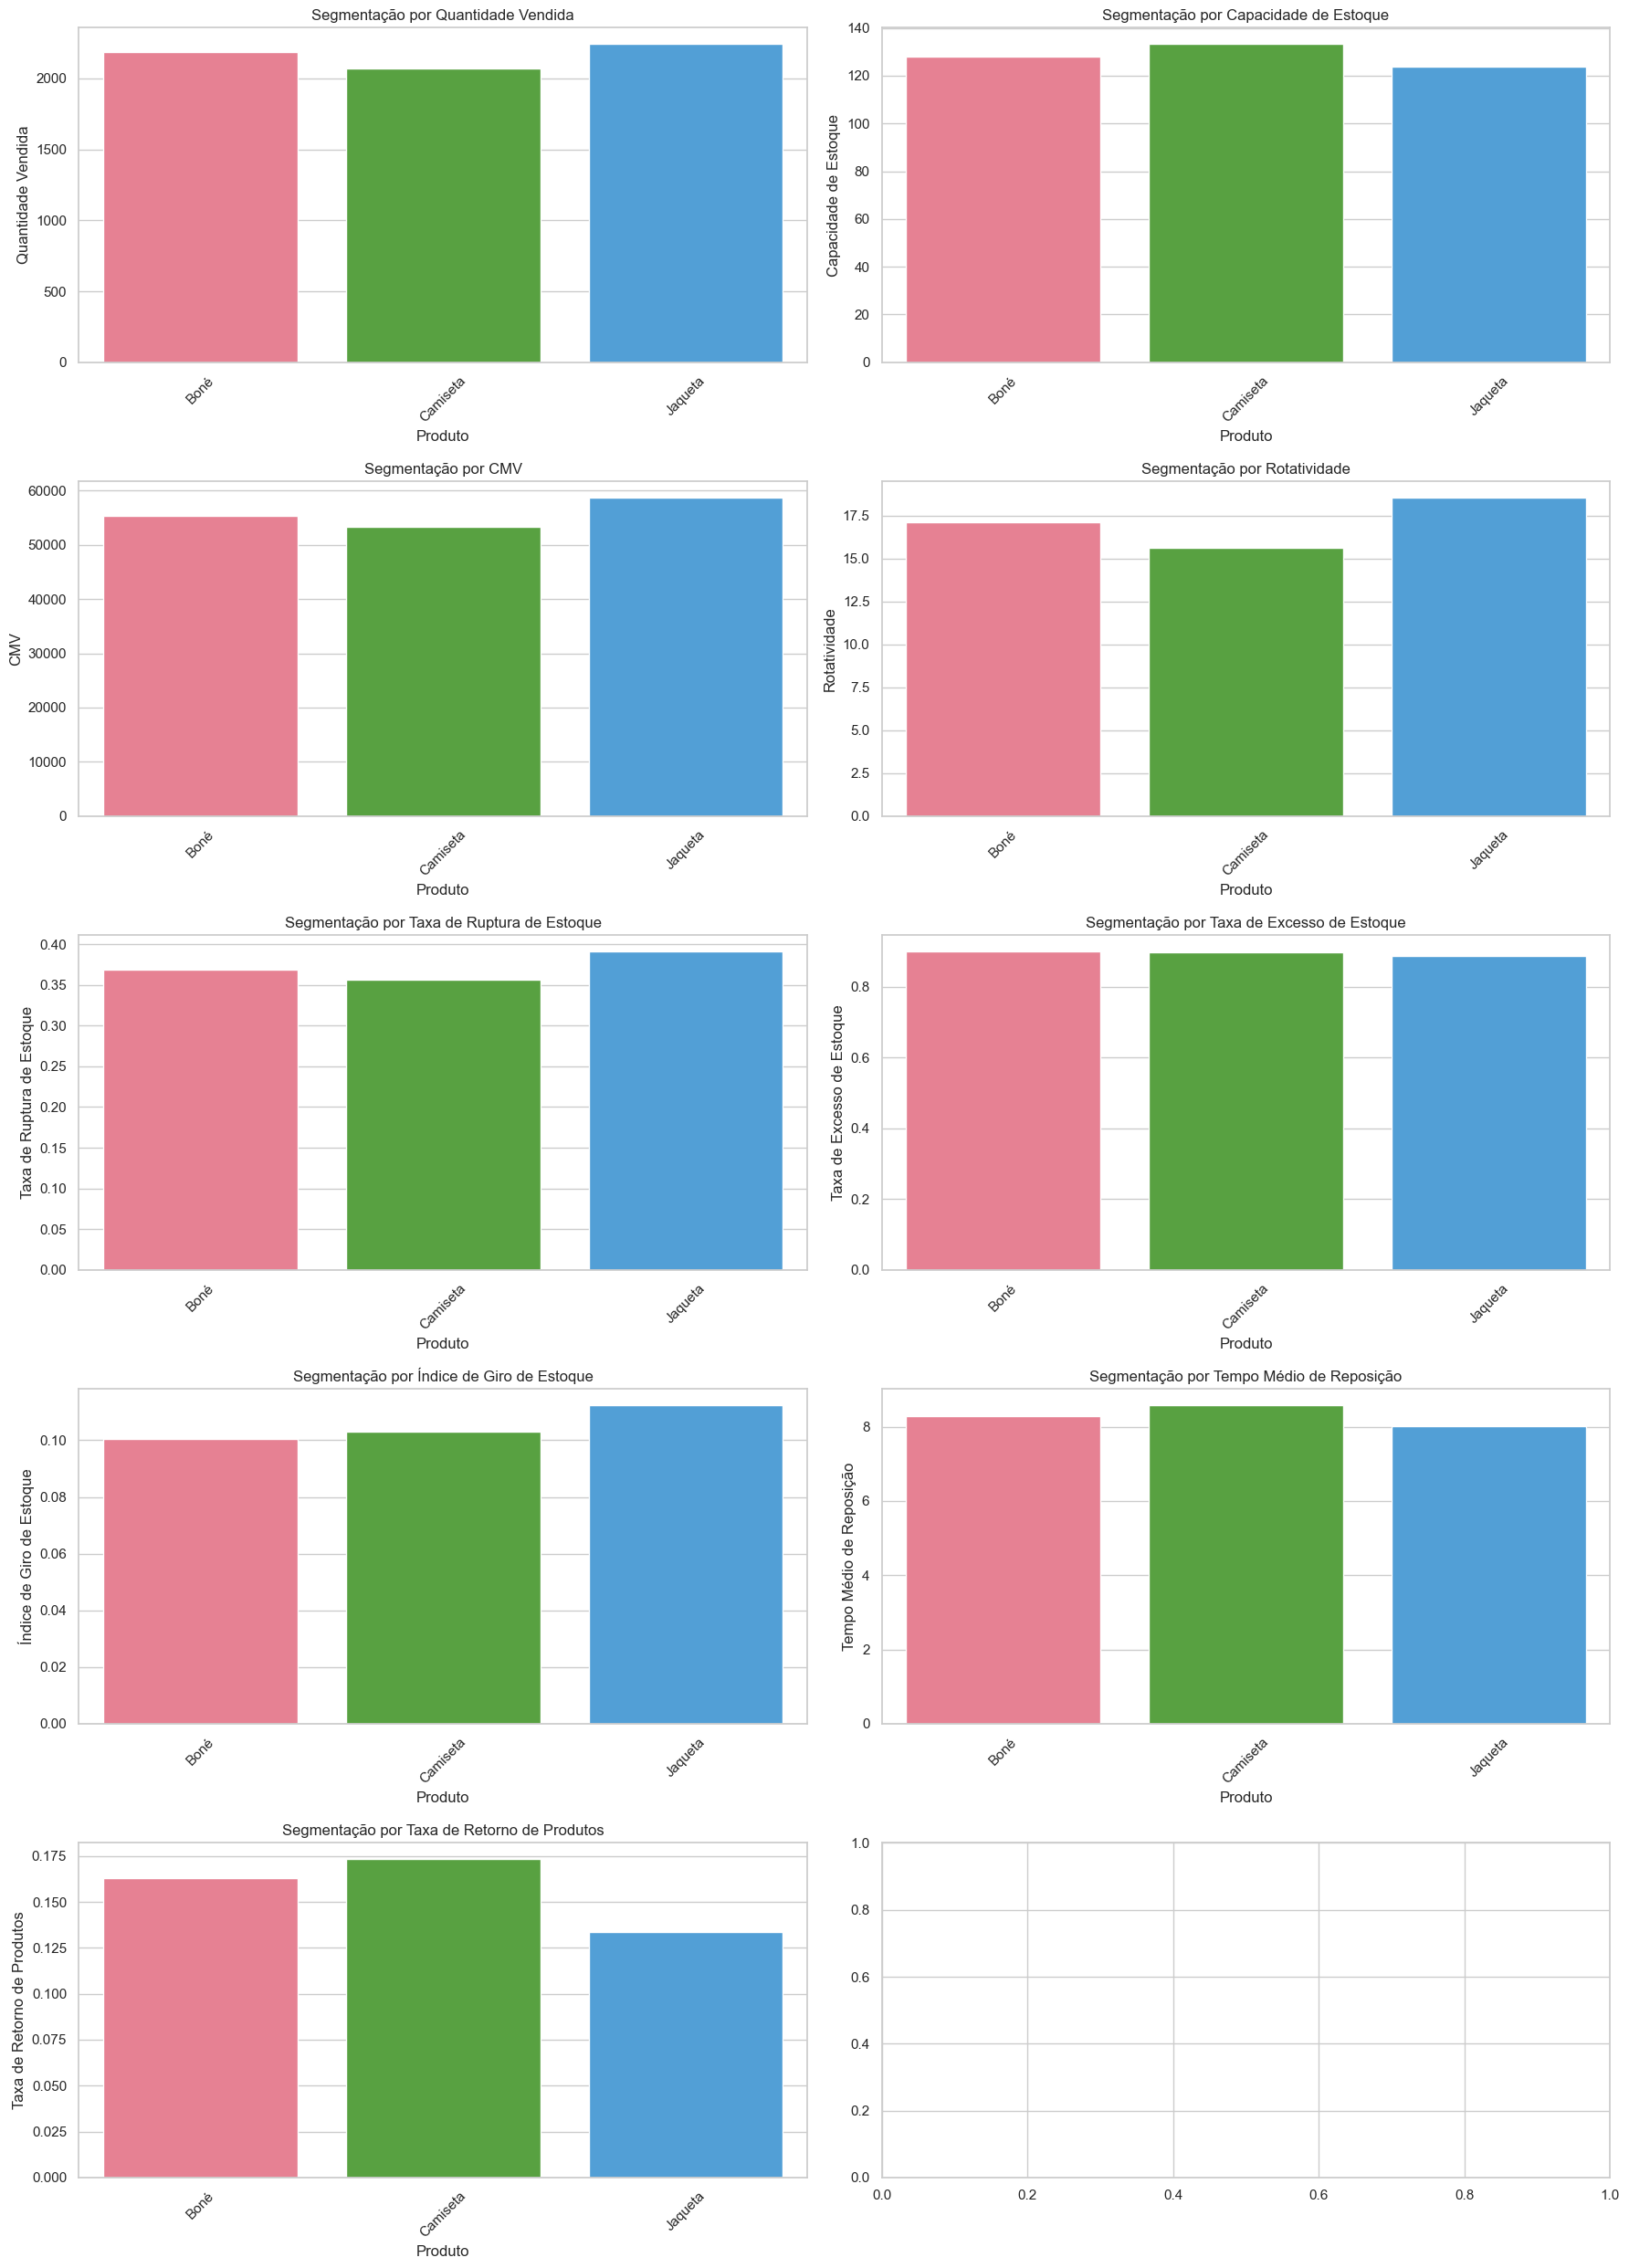

In [10]:
# Agrupar os dados por Produto para análise de segmentação
segmentacao = df.groupby('Produto').agg({
    'Quantidade Vendida': 'sum',
    'Capacidade de Estoque': 'sum',
    'CMV': 'sum',
    'Capacidade de Estoque': 'mean',
    'Rotatividade': 'mean',
    'Taxa de Ruptura de Estoque': 'mean',
    'Taxa de Excesso de Estoque': 'mean',
    'Índice de Giro de Estoque': 'mean',
    'Tempo Médio de Reposição': 'mean',
    'Taxa de Retorno de Produtos': 'mean'
}).reset_index()

# Exibir a segmentação dos produtos
print(segmentacao)

# Exibir gráficos de Segmentação dos KPIs
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar um gráfico de barras para cada KPI
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 25))

kpis = [
    'Quantidade Vendida',
    'Capacidade de Estoque',
    'CMV',
    'Rotatividade',
    'Taxa de Ruptura de Estoque',
    'Taxa de Excesso de Estoque',
    'Índice de Giro de Estoque',
    'Tempo Médio de Reposição',
    'Taxa de Retorno de Produtos'
]

# Paleta de cores
palette = sns.color_palette("husl", len(segmentacao['Produto'].unique()))

for ax, kpi in zip(axes.flatten(), kpis):
    sns.barplot(x='Produto', y=kpi, data=segmentacao, ax=ax, palette=palette)
    ax.set_title(f'Segmentação por {kpi}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ajustar o layout
plt.tight_layout()
plt.show()


In [11]:
# Salvar o resultado em um novo arquivo CSV
df.to_csv('analise_estoque_atualizada.csv', index=False)

 # Relátorio do problema 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet

# Carregar os dados
df = pd.read_csv('analise_estoque_atualizada.csv')

# Função para criar gráficos de barras com cores diferentes
def criar_grafico_barras(x, y, titulo, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=x, y=y, data=df, palette='husl')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    # Adicionar valores nas barras
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
    plt.show()

# Função para criar gráficos interativos com Plotly
def criar_grafico_interativo(x, y, titulo):
    fig = px.bar(df, x=x, y=y, title=titulo, color=x)
    fig.show()


# Seção 1: Introdução
print("Relatório de Análise de Estoque e Previsão de Demanda")
print("Este relatório apresenta uma análise detalhada das métricas de estoque e uma previsão de demanda para os produtos da empresa.")

# Seção 2: Análise da Rotatividade do Estoque
print("\nAnálise da Rotatividade do Estoque")
print("A rotatividade do estoque é uma métrica que indica quantas vezes o estoque foi renovado durante um período específico.")
print("Dados de Rotatividade por Produto:")
print("Boné: 17")
print("Camiseta: 16")
print("Jaqueta: 19")
criar_grafico_interativo('Produto', 'Rotatividade', 'Rotatividade do Estoque por Produto')

# Seção 3: Análise da Taxa de Ruptura de Estoque
print("\nAnálise da Taxa de Ruptura de Estoque")
print("A taxa de ruptura de estoque indica a frequência com que o estoque de um produto atingiu o ponto de reposição.")
print("Dados de Taxa de Ruptura de Estoque por Produto:")
print("Boné: 36.84%")
print("Camiseta: 35.59%")
print("Jaqueta: 39.12%")
criar_grafico_interativo('Produto', 'Taxa de Ruptura de Estoque', 'Taxa de Ruptura de Estoque por Produto')

# Seção 4: Análise da Taxa de Excesso de Estoque
print("\nAnálise da Taxa de Excesso de Estoque")
print("A taxa de excesso de estoque indica a proporção do estoque que não foi vendido em relação à capacidade total de estoque.")
print("Dados de Taxa de Excesso de Estoque por Produto:")
print("Boné: 89.96%")
print("Camiseta: 89.69%")
print("Jaqueta: 88.76%")
criar_grafico_interativo('Produto', 'Taxa de Excesso de Estoque', 'Taxa de Excesso de Estoque por Produto')

# Seção 5: Análise do Índice de Giro de Estoque
print("\nAnálise do Índice de Giro de Estoque")
print("O índice de giro de estoque indica a rapidez com que o estoque é vendido e reposto.")
print("Dados do Índice de Giro de Estoque por Produto:")
print("Boné: 10.04%")
print("Camiseta: 10.31%")
print("Jaqueta: 11.24%")
criar_grafico_interativo('Produto', 'Índice de Giro de Estoque', 'Índice de Giro de Estoque por Produto')

# Seção 6: Análise do Tempo Médio de Reposição
print("\nAnálise do Tempo Médio de Reposição")
print("O tempo médio de reposição indica o tempo necessário para repor o estoque de um produto.")
print("Dados de Tempo Médio de Reposição por Produto:")
print("Boné: 8. dias")
print("Camiseta: 9 dias")
print("Jaqueta: 8 dias")
criar_grafico_interativo('Produto', 'Tempo Médio de Reposição', 'Tempo Médio de Reposição por Produto')

# Seção 7: Análise da Taxa de Retorno de Produtos
print("\nAnálise da Taxa de Retorno de Produtos")
print("A taxa de retorno de produtos indica a proporção de produtos vendidos que foram devolvidos pelos clientes.")
print("Dados de Taxa de Retorno de Produtos por Produto:")
print("Boné: 16.30%")
print("Camiseta: 17.34%")
print("Jaqueta: 13.35%")
criar_grafico_interativo('Produto', 'Taxa de Retorno de Produtos', 'Taxa de Retorno de Produtos por Produto')

# Seção 8: Previsão de Demanda
def previsao_demanda(produto):
    print(f"\nPrevisão de Demanda para {produto}")
    produto_especifico = df[df['Produto'] == produto]
    vendas_por_data = produto_especifico.groupby('Data')['Quantidade Vendida'].sum().reset_index()
    vendas_por_data.columns = ['ds', 'y']
    modelo = Prophet()
    modelo.fit(vendas_por_data)
    futuro = modelo.make_future_dataframe(periods=365)
    previsao = modelo.predict(futuro)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=previsao['ds'], y=previsao['yhat'], mode='lines', name='Previsão'))
    fig.add_trace(go.Scatter(x=vendas_por_data['ds'], y=vendas_por_data['y'], mode='lines', name='Dados Reais'))
    fig.update_layout(title=f'Previsão de Demanda para {produto}', xaxis_title='Data', yaxis_title='Quantidade Vendida')
    fig.show()

# Previsões para produtos específicos
previsao_demanda('Jaqueta')
previsao_demanda('Boné')
previsao_demanda('Camiseta')

# Seção 9: Conclusão
print("\nConclusão")
print("Este relatório apresentou uma visão detalhada das métricas de estoque e uma previsão de demanda para os produtos da empresa. As análises realizadas fornecem insights valiosos para a gestão eficiente do estoque e para a tomada de decisões estratégicas.")



Relatório de Análise de Estoque e Previsão de Demanda
Este relatório apresenta uma análise detalhada das métricas de estoque e uma previsão de demanda para os produtos da empresa.

Análise da Rotatividade do Estoque
A rotatividade do estoque é uma métrica que indica quantas vezes o estoque foi renovado durante um período específico.
Dados de Rotatividade por Produto:
Boné: 17
Camiseta: 16
Jaqueta: 19



Análise da Taxa de Ruptura de Estoque
A taxa de ruptura de estoque indica a frequência com que o estoque de um produto atingiu o ponto de reposição.
Dados de Taxa de Ruptura de Estoque por Produto:
Boné: 36.84%
Camiseta: 35.59%
Jaqueta: 39.12%



Análise da Taxa de Excesso de Estoque
A taxa de excesso de estoque indica a proporção do estoque que não foi vendido em relação à capacidade total de estoque.
Dados de Taxa de Excesso de Estoque por Produto:
Boné: 89.96%
Camiseta: 89.69%
Jaqueta: 88.76%



Análise do Índice de Giro de Estoque
O índice de giro de estoque indica a rapidez com que o estoque é vendido e reposto.
Dados do Índice de Giro de Estoque por Produto:
Boné: 10.04%
Camiseta: 10.31%
Jaqueta: 11.24%



Análise do Tempo Médio de Reposição
O tempo médio de reposição indica o tempo necessário para repor o estoque de um produto.
Dados de Tempo Médio de Reposição por Produto:
Boné: 8. dias
Camiseta: 9 dias
Jaqueta: 8 dias



Análise da Taxa de Retorno de Produtos
A taxa de retorno de produtos indica a proporção de produtos vendidos que foram devolvidos pelos clientes.
Dados de Taxa de Retorno de Produtos por Produto:
Boné: 16.30%
Camiseta: 17.34%
Jaqueta: 13.35%



Previsão de Demanda para Jaqueta


16:04:31 - cmdstanpy - INFO - Chain [1] start processing
16:04:32 - cmdstanpy - INFO - Chain [1] done processing



Previsão de Demanda para Boné


16:04:33 - cmdstanpy - INFO - Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing


16:04:34 - cmdstanpy - INFO - Chain [1] start processing



Previsão de Demanda para Camiseta


16:04:34 - cmdstanpy - INFO - Chain [1] done processing



Conclusão
Este relatório apresentou uma visão detalhada das métricas de estoque e uma previsão de demanda para os produtos da empresa. As análises realizadas fornecem insights valiosos para a gestão eficiente do estoque e para a tomada de decisões estratégicas.


Relátorio Salvo em pdf

In [13]:
%pip install fpdf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from prophet import Prophet
import plotly.graph_objects as go

# Carregar os dados
df = pd.read_csv('analise_estoque_atualizada.csv')

# Função para criar gráficos de barras com cores diferentes
def criar_grafico_barras(x, y, titulo, xlabel, ylabel, filename):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=x, y=y, data=df, palette='husl')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    # Adicionar valores nas barras
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
    plt.savefig(filename)
    plt.close()

# Função para previsões de demanda
def previsao_demanda(produto, filename):
    produto_especifico = df[df['Produto'] == produto]
    vendas_por_data = produto_especifico.groupby('Data')['Quantidade Vendida'].sum().reset_index()
    vendas_por_data.columns = ['ds', 'y']
    modelo = Prophet()
    modelo.fit(vendas_por_data)
    futuro = modelo.make_future_dataframe(periods=365)
    previsao = modelo.predict(futuro)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=previsao['ds'], y=previsao['yhat'], mode='lines', name='Previsão'))
    fig.add_trace(go.Scatter(x=vendas_por_data['ds'], y=vendas_por_data['y'], mode='lines', name='Dados Reais'))
    fig.update_layout(title=f'Previsão de Demanda para {produto}', xaxis_title='Data', yaxis_title='Quantidade Vendida')
    fig.write_image(filename)

# Criar gráficos e salvar as imagens
criar_grafico_barras('Produto', 'Rotatividade', 'Rotatividade do Estoque por Produto', 'Produto', 'Rotatividade', 'rotatividade.png')
criar_grafico_barras('Produto', 'Taxa de Ruptura de Estoque', 'Taxa de Ruptura de Estoque por Produto', 'Produto', 'Taxa de Ruptura de Estoque', 'taxa_ruptura.png')
criar_grafico_barras('Produto', 'Taxa de Excesso de Estoque', 'Taxa de Excesso de Estoque por Produto', 'Produto', 'Taxa de Excesso de Estoque', 'taxa_excesso.png')
criar_grafico_barras('Produto', 'Índice de Giro de Estoque', 'Índice de Giro de Estoque por Produto', 'Produto', 'Índice de Giro de Estoque', 'indice_giro.png')
criar_grafico_barras('Produto', 'Tempo Médio de Reposição', 'Tempo Médio de Reposição por Produto', 'Produto', 'Tempo Médio de Reposição', 'tempo_reposicao.png')
criar_grafico_barras('Produto', 'Taxa de Retorno de Produtos', 'Taxa de Retorno de Produtos por Produto', 'Produto', 'Taxa de Retorno de Produtos', 'taxa_retorno.png')
previsao_demanda('Jaqueta', 'previsao_jaqueta.png')
previsao_demanda('Boné', 'previsao_bone.png')
previsao_demanda('Camiseta', 'previsao_camiseta.png')

# Função para criar o relatório em PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Relatório de Análise de Estoque', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(10)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, w=180, h=100):
        self.image(image_path, x=None, y=None, w=w, h=h)
        self.ln()

# Criação do PDF
pdf = PDF()
pdf.add_page()

# Seção 1: Introdução
pdf.set_font("Arial", size=12)
pdf.chapter_title("Introdução")
intro_text = """
Relatório de Análise de Estoque e Previsão de Demanda
Este relatório apresenta uma análise detalhada das métricas de estoque e uma previsão de demanda para os produtos da empresa.
"""
pdf.chapter_body(intro_text)

# Seção 2: Análise da Rotatividade do Estoque
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Análise da Rotatividade do Estoque")
rotatividade_media = df['Rotatividade'].mean()
rotatividade_analise = f"""
A rotatividade do estoque é uma métrica que indica quantas vezes o estoque foi renovado durante um período específico.
A média da rotatividade do estoque é de {rotatividade_media:.2f}. Produtos com alta rotatividade indicam vendas frequentes,
enquanto produtos com baixa rotatividade podem indicar problemas de venda.
"""
pdf.chapter_body(rotatividade_analise)
pdf.add_image('rotatividade.png')

# Seção 3: Análise da Taxa de Ruptura de Estoque
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Análise da Taxa de Ruptura de Estoque")
taxa_ruptura_media = df['Taxa de Ruptura de Estoque'].mean()
taxa_ruptura_analise = f"""
A taxa de ruptura de estoque indica a frequência com que o estoque de um produto atingiu o ponto de reposição.
A média da taxa de ruptura de estoque é de {taxa_ruptura_media:.2f}. Altas taxas de ruptura indicam problemas frequentes de falta de estoque,
o que pode levar à perda de vendas.
"""
pdf.chapter_body(taxa_ruptura_analise)
pdf.add_image('taxa_ruptura.png')

# Seção 4: Análise da Taxa de Excesso de Estoque
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Análise da Taxa de Excesso de Estoque")
taxa_excesso_media = df['Taxa de Excesso de Estoque'].mean()
taxa_excesso_analise = f"""
A taxa de excesso de estoque indica a proporção do estoque que não foi vendido em relação à capacidade total de estoque.
A média da taxa de excesso de estoque é de {taxa_excesso_media:.2f}. Altas taxas de excesso indicam sobrecarga de estoque,
o que pode aumentar os custos de armazenamento.
"""
pdf.chapter_body(taxa_excesso_analise)
pdf.add_image('taxa_excesso.png')

# Seção 5: Análise do Índice de Giro de Estoque
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Análise do Índice de Giro de Estoque")
indice_giro_medio = df['Índice de Giro de Estoque'].mean()
indice_giro_analise = f"""
O índice de giro de estoque indica a rapidez com que o estoque é vendido e reposto. A média do índice de giro de estoque é de {indice_giro_medio:.2f}.
Um alto índice de giro é desejável, pois indica eficiência na gestão do estoque.
"""
pdf.chapter_body(indice_giro_analise)
pdf.add_image('indice_giro.png')

# Seção 6: Análise do Tempo Médio de Reposição
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Análise do Tempo Médio de Reposição")
tempo_reposicao_medio = df['Tempo Médio de Reposição'].mean()
tempo_reposicao_analise = f"""
O tempo médio de reposição indica o tempo necessário para repor o estoque de um produto. A média do tempo de reposição é de {tempo_reposicao_medio:.2f} dias.
Um tempo de reposição baixo é ideal para minimizar a falta de estoque.
"""
pdf.chapter_body(tempo_reposicao_analise)
pdf.add_image('tempo_reposicao.png')

# Seção 7: Análise da Taxa de Retorno de Produtos
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Análise da Taxa de Retorno de Produtos")
taxa_retorno_media = df['Taxa de Retorno de Produtos'].mean()
taxa_retorno_analise = f"""
A taxa de retorno de produtos indica a proporção de produtos vendidos que foram devolvidos pelos clientes. A média da taxa de retorno é de {taxa_retorno_media:.2f}.
Altas taxas de retorno podem indicar problemas de qualidade ou insatisfação do cliente.
"""
pdf.chapter_body(taxa_retorno_analise)
pdf.add_image('taxa_retorno.png')

# Seção 8: Previsão de Demanda
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Previsão de Demanda para Jaqueta")
previsao_demanda_analise = """
A previsão de demanda foi realizada utilizando o modelo Prophet para prever a demanda futura de produtos.
A seguir, apresentamos a previsão de demanda para Jaqueta.
"""
pdf.chapter_body(previsao_demanda_analise)
pdf.add_image('previsao_jaqueta.png')

pdf.chapter_title("Previsão de Demanda para Boné")
previsao_demanda_analise = """
A previsão de demanda foi realizada utilizando o modelo Prophet para prever a demanda futura de produtos.
A seguir, apresentamos a previsão de demanda para Boné.
"""
pdf.chapter_body(previsao_demanda_analise)
pdf.add_image('previsao_bone.png')

pdf.chapter_title("Previsão de Demanda para Camiseta")
previsao_demanda_analise = """
A previsão de demanda foi realizada utilizando o modelo Prophet para prever a demanda futura de produtos.
A seguir, apresentamos a previsão de demanda para Camiseta.
"""
pdf.chapter_body(previsao_demanda_analise)
pdf.add_image('previsao_camiseta.png')

# Seção 9: Estratégias Recomendadas
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.chapter_title("Estratégias Recomendadas")
estrategias = """
Com base nas análises realizadas, as seguintes estratégias são recomendadas para resolver os problemas de negócio identificados:

1. **Otimização da Gestão de Estoque:**
   - Implementar sistemas de monitoramento em tempo real para rastrear níveis de estoque e identificar rapidamente problemas de ruptura ou excesso.
   - Utilizar técnicas de análise preditiva para ajustar os níveis de estoque com base na demanda prevista.
   - Utilizar técnicas de otimização de estoque, como o transporte, para reduzir o tempo de transporte e o custo de transporte.

2. **Redução da Ruptura de Estoque:**
   - Melhorar a comunicação com fornecedores para garantir prazos de entrega mais curtos e previsíveis.
   - Implementar um sistema de reabastecimento automático baseado na demanda histórica e previsões de vendas.
   - Utilizar a técnica do crow-funding para incentivar o fornecimento de produtos de alta demanda.

3. **Minimização do Excesso de Estoque:**
   - Revisar periodicamente os níveis de estoque e ajustar as quantidades de pedido com base na análise de vendas e sazonalidade.
   - Oferecer promoções e descontos em produtos com alta taxa de excesso de estoque para reduzir o volume armazenado.
   - Implementar um sistema de alerta para notificar os clientes sobre o excesso de estoque e proporcionar oportunidades de compra em tempo real.

4. **Melhoria na Previsão de Demanda:**
   - Utilizar modelos avançados de previsão de demanda, como o Prophet, para prever com maior precisão as necessidades de estoque.
   - Integrar dados externos, como tendências de mercado e comportamento do consumidor, nas análises de previsão de demanda.
   - Atualizar o modelo de previsão de demanda regularmente para garantir que as previsões sejam precisas.

5. **Redução da Taxa de Retorno de Produtos:**
   - Melhorar a qualidade dos produtos e garantir que as descrições e especificações estejam claras e precisas.
   - Oferecer um serviço de atendimento ao cliente eficiente para resolver rapidamente quaisquer problemas ou dúvidas dos clientes.
   - Auxiliar os clientes a identificar os produtos mais relevantes para o seu negócio e oferecer promoções personalizadas.

6. **Aumento da Capacidade do Estoque:**
   - Aumentar a capacidade do estoque para atender à demanda crescente e evitar o risco de falta de estoque.
   - Implementar um sistema de reabastecimento baseado na demanda histórica e previsões de vendas.
   - Utilizar a técnica do crow-funding para incentivar o fornecimento de produtos de alta demanda.

   - **Nota:** As estratégias recomendadas podem variar de acordo com as necessidades e características do seu negócio. Em geral, é importante considerar a interdependência entre as estratégias, a capacidade do seu estoque e a disponibilidade de recursos para implementá-las.
"""
pdf.chapter_body(estrategias)

# Salvar o PDF
pdf.output('relatorio_analise_estoque_previsao_demanda_estrategias.pdf')


C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\3541595741.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\3541595741.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\3541595741.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sara1\AppData\Local\Temp\ipykernel_2656\3541595741.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

''